In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
data = pd.read_csv("../data/BostonHousing.csv")

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


1. Небольшой eda

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.isnull().values.any()  # в датасете нет пропущенных значений

False

In [7]:
X = data.drop(['medv'], axis=1)
X.shape

(506, 13)

In [8]:
y = data['medv']

Correlation PLot

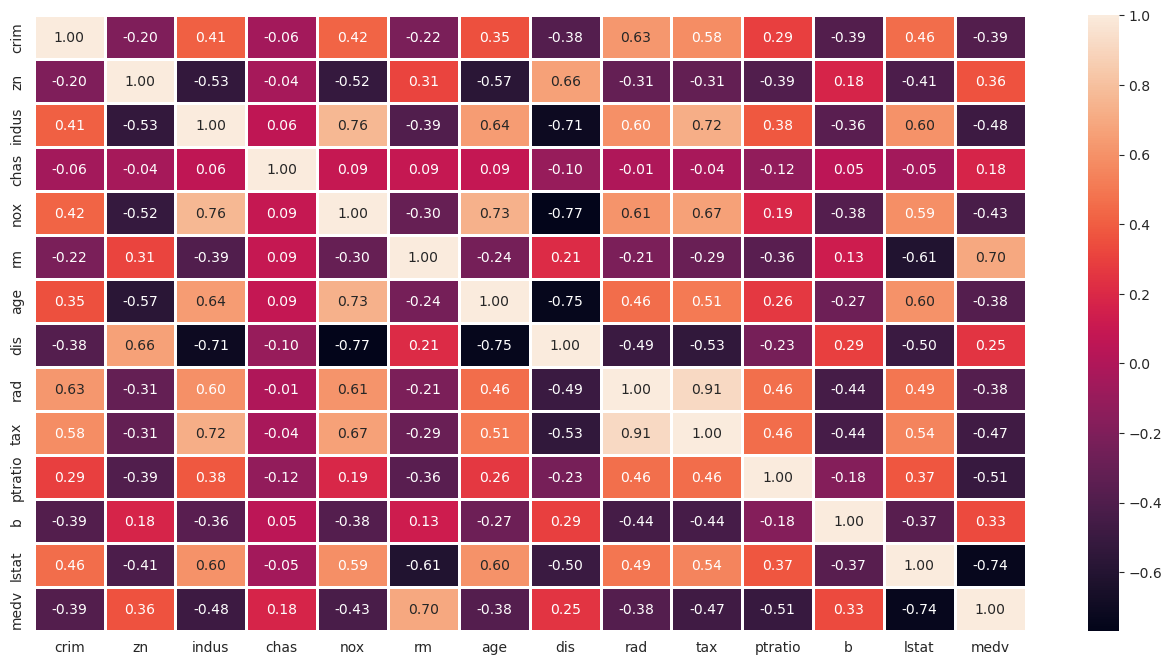

In [9]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

Видим некоторые признаки довольно сильно коррелируют друг с другом, так и некоторые признаки плохо коррелируют с таргетом.

###### переменные lstat и rm больше всех коррелируют с таргетом.

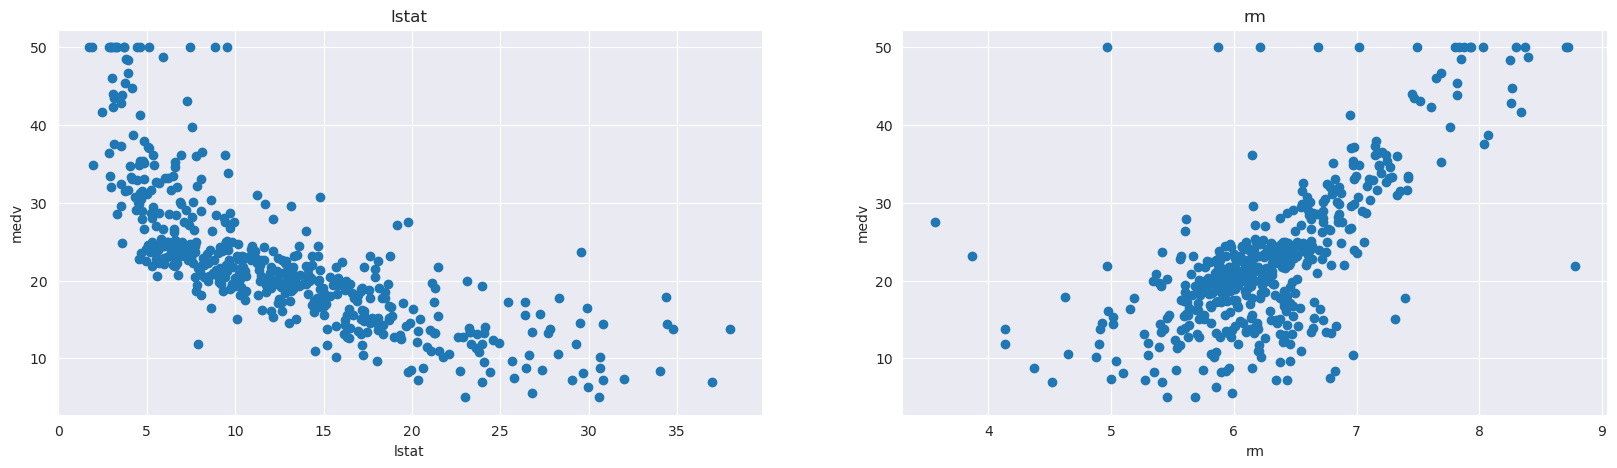

In [10]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = data['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

Посмотрим scatter plot каждой переменной на y

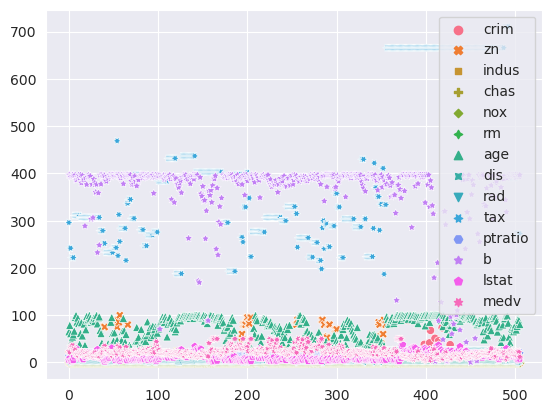

In [11]:
sns.scatterplot(pd.concat([X, y], axis=1));

Boxplots

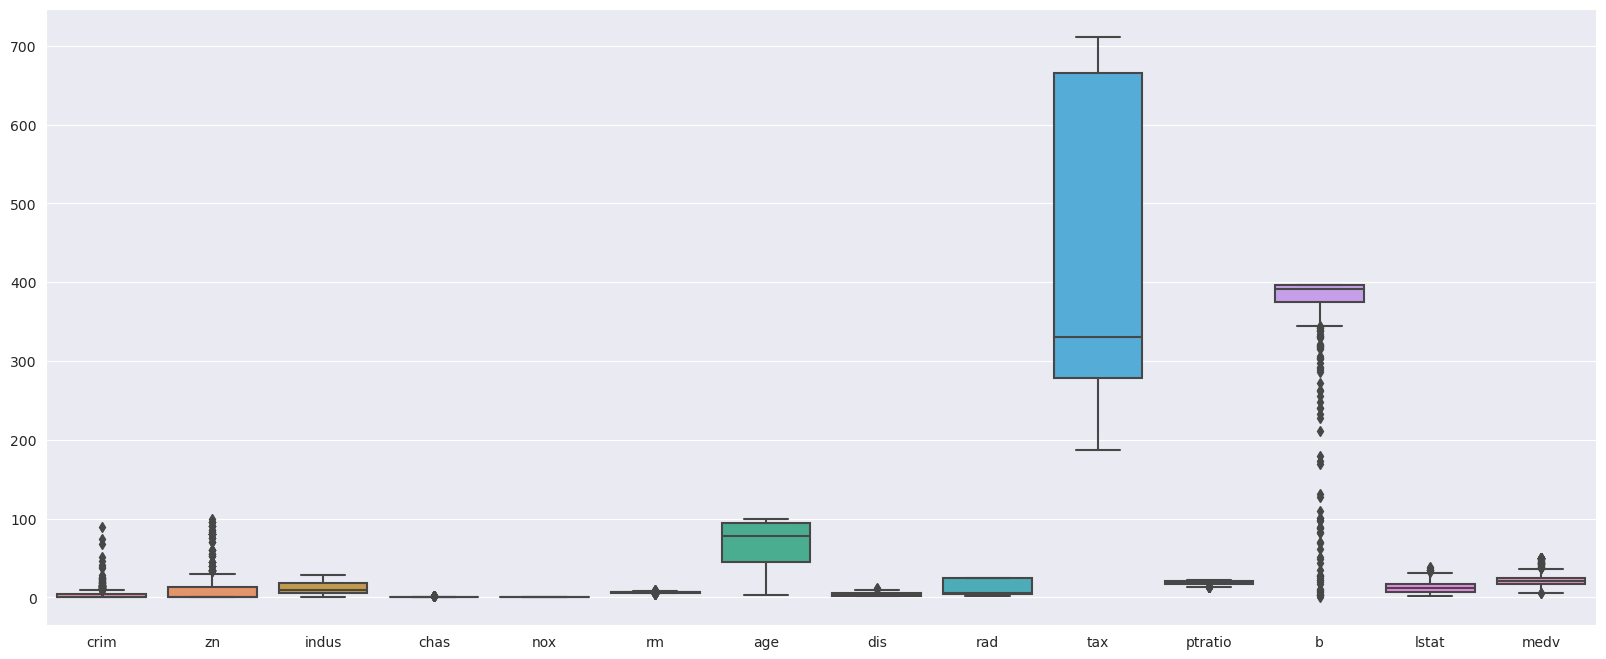

In [12]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = data, width = 0.8)
plt.show()

/tmp/ipykernel_234425/1694659959.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, bins=30)


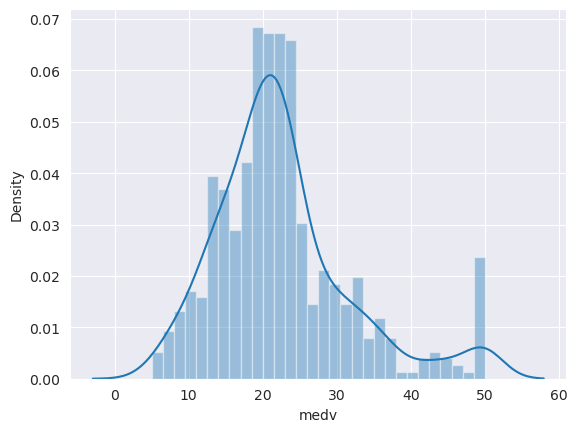

In [13]:
sns.distplot(y, bins=30)
plt.show()

Распределение близкое к нормальному, есть 'тяжелый' хвост справа

##### Сделаем станадартизацию в данных

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Построим линейную модель на всех признаках

In [15]:
data.shape

(506, 14)

In [16]:
X_scaled = sm.add_constant(X_scaled)   # добавляем свободный коэффициент
model_full = sm.OLS(y, X_scaled)
results_full = model_full.fit()
print(results_full.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        00:51:15   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

#### 2. Интерпретация

Если величина коеффициента сильно больше чем standart error, то вероятнее всего этот признак значим для модели.
 (coeff +- 1.96*std.error) Границы доверительного интервала не сильно меняются если coeff >> std.error)

###### t (t b = coeff/std.error
Большое значение t value говорит о стат значимости, что, соотвествующие коеффициенты отличны от нуля, то есть стат значимы и составляют линейную зависмость с таргетом

##### P > |t|
p-value показывает стат значимость значимость линейной зависимости переменной на таргет в модели.
Только две переменные имеют p-value больше чем 0.05 - то есть не имеют лин зависимости с таргетом

###### R^2
Наши признаки объясняют только 74 % процентов дисперсии зависимой переменной, что на первый взгляд неплохо.

###### Prob (F-statistic)
Вероятность ошибка 1 рода, 6.72e-135, можем отклонить нулевую гипотезу (есть хотя бы одна независимая переменная имеющая лин зависимость с таргетом (стоимостью жилья)

Посмотрим на распределение остатков

In [17]:
import numpy as np

In [19]:
res_resid = [results_full.resid.min(), np.quantile(results_full.resid, 0.25), np.quantile(results_full.resid, 0.5), results_full.resid.mean(),  np.quantile(results_full.resid, 0.75),  results_full.resid.max()]
col = ["Min", "1st qu", "Median", "Mean", "3st qu", "Max"]
pd.DataFrame([res_resid], columns=col)


,Min,1st qu,Median,Mean,3st qu,Max
0,-15.594474,-2.729716,-0.518049,-2.341561e-15,1.777051,26.199271


###### Видно что модель как и перепредсказывает, так и недопредсказывает

In [20]:
import pylab as py

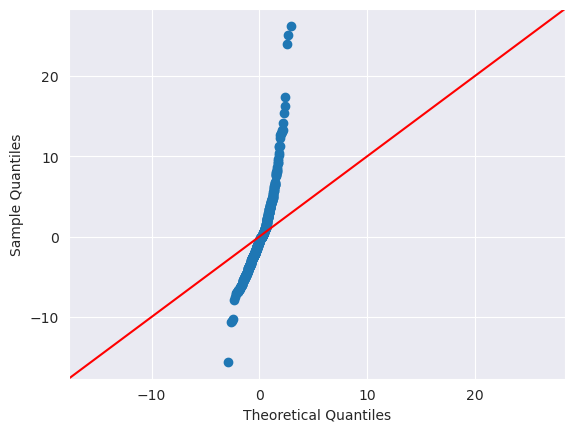

In [21]:
sm.qqplot(results_full.resid, line ='45')
py.show()

##### Видим распределение остатков отличное  от нормального

In [23]:
results_full.params  # веса каждой переменной составляют модель

const    22.532806
x1       -0.928146
x2        1.081569
x3        0.140900
x4        0.681740
x5       -2.056718
x6        2.674230
x7        0.019466
x8       -3.104044
x9        2.662218
x10      -2.076782
x11      -2.060607
x12       0.849268
x13      -3.743627
dtype: float64

In [24]:
prediction_result = results_full.get_prediction(X_scaled)
y_pred = prediction_result.predicted_mean

Посмотрим на scatter plot предсказания и истинного значения

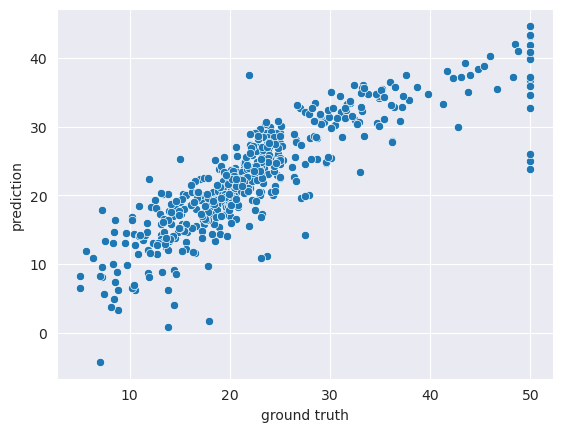

In [25]:
sns.scatterplot(x = y, y = y_pred)
plt.xlabel("ground truth")
plt.ylabel("prediction");

В целом видим корреляцию, но есть  'столбик' при истинных значениях 50 модель выдает разные результаты.

Посмотрим на scatter plot остатков и предсказаний

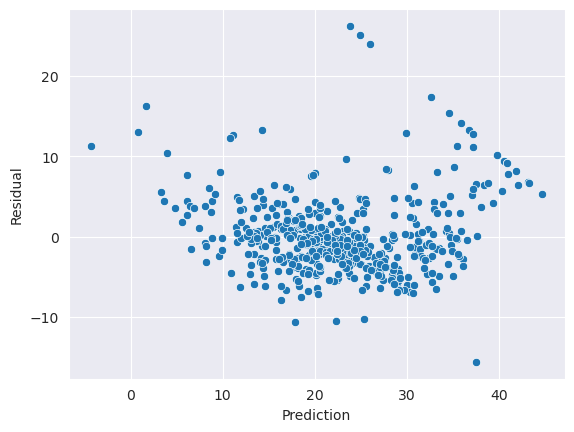

In [26]:

sns.scatterplot(x = y_pred, y = results_full.resid)
plt.xlabel("Prediction")
plt.ylabel("Residual");

##### График показывет ошибку предсказания для каждой точки;
Было би идеально если бы все точки лежали на прямой y = 0,
так они отклоняются верх и вниз, но немного не симметрично, при значениях prediction ~30-40 видим больше перепредсказание (residual > 0)
наверняка это мб связано с выбросами в таргете

/tmp/ipykernel_234425/450693409.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results_full.resid, bins=30)


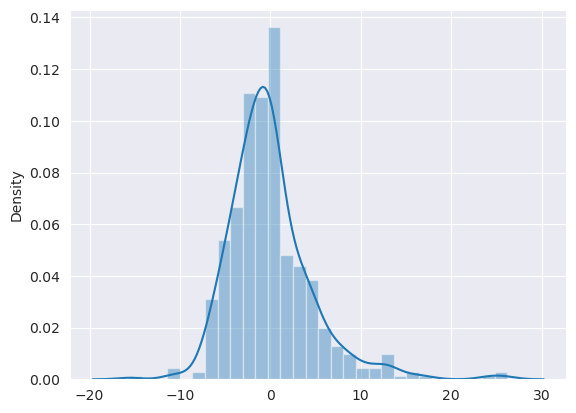

In [27]:
sns.distplot(results_full.resid, bins=30)
plt.show()

###### хвосты немного не симметричны, правее больше точек (residual > 0)

######
### 3. Наибольшим по модулю коеффициентом обладает переменная x13, построим предсказания по ней.

In [54]:
subset_w = results_full.params[[0, 13]]

In [55]:
subset_X = X_scaled[:, [0, 13]]

In [56]:
y_pred_two = np.dot(subset_X, subset_w)

In [62]:
residues = y_pred_two - y

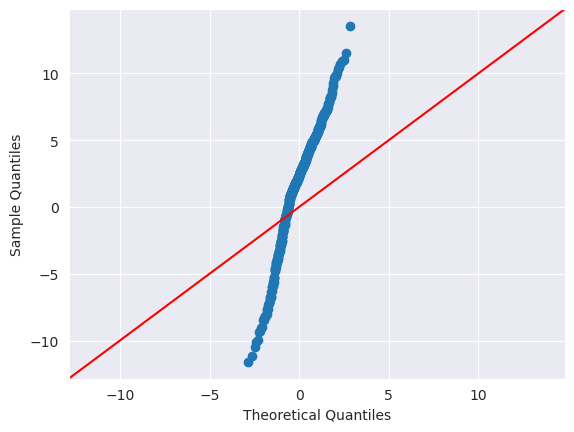

In [63]:
sm.qqplot(residues, line ='45')
py.show()

In [64]:
def calculate_r2(target, prediction):
    r2 = 1 - np.power((target - prediction), 2).sum() \
         / np.power((target - target.mean()), 2).sum()
    return r2

In [65]:
calculate_r2(y, y_pred_two)

0.4805916004437415

In [66]:
def calculate_r2_adj(target, prediction, features):
    n, p = features.shape
    r2 = calculate_r2(target, prediction)
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p)
    return r2_adj

In [67]:
calculate_r2_adj(y, y_pred_two, subset_X)

0.47947218578952544

###### судя по метрике r2 модель построенная по одной переменной показывает худшее качество чем полная линейная модель

###### Построим график

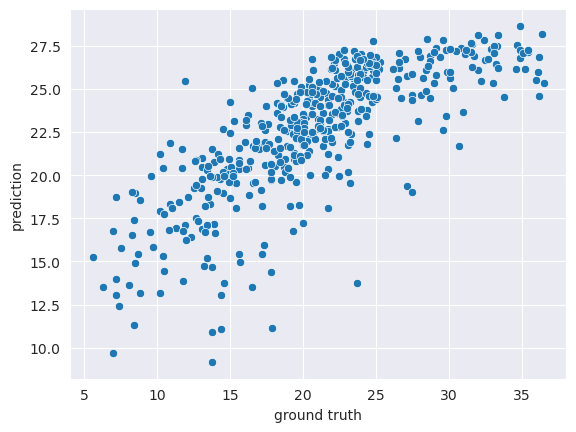

In [68]:
sns.scatterplot(x = y, y = y_pred_two)
plt.xlabel("ground truth")
plt.ylabel("prediction");

#### Посмотрим на расстояние кука c целью поймать выбросы

In [69]:

influence = results_full.get_influence()
cooks = influence.cooks_distance

In [70]:
(cooks[1] < 0.05).sum()    # судя по расстоянию кука выбросов нет

0

###### Посмотрим на boxplot  по таргету

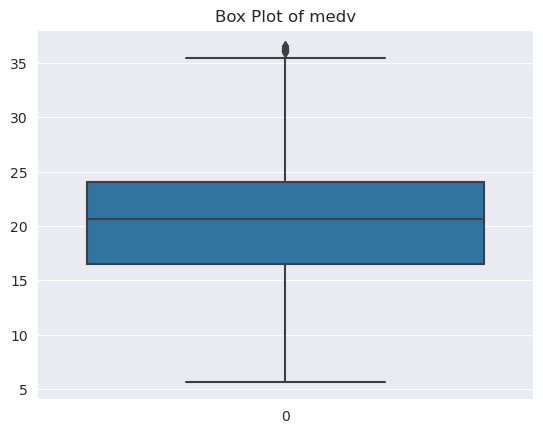

In [71]:
sns.boxplot(data=y).set(title="Box Plot of medv");

In [72]:
#посчитаем iqr, удалим выбросы

In [73]:
iqr = np.quantile(y, 0.75) - np.quantile(y, 0.25)
down = np.quantile(y, 0.25) - 1.5 * iqr
upper  = np.quantile(y, 0.75) + 1.5 * iqr

In [74]:
modif_data = data[(data['medv']>down) & (data['medv']<upper)]

In [75]:
X = modif_data.drop(["medv"], axis = 1)
y = modif_data["medv"]

In [76]:
# Построим модель, опять предварительно стандартизовав признаки

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
X_scaled = sm.add_constant(X_scaled)   # добавляем свободный коэффициент
model_upd1 = sm.OLS(y, X_scaled)
results_upd1 = model_upd1.fit()
print(results_upd1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     110.4
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          2.77e-130
Time:                        00:57:51   Log-Likelihood:                -1163.6
No. Observations:                 460   AIC:                             2355.
Df Residuals:                     446   BIC:                             2413.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.5167      0.144    142.696      0.0

###### R2 вырос по сравнению с первой полной линейной моделью, skew оиждаемо стал ниже

In [79]:
res_resid = [results_upd1.resid.min(), np.quantile(results_upd1.resid, 0.25), np.quantile(results_upd1.resid, 0.5), results_upd1.resid.mean(),  np.quantile(results_upd1.resid, 0.75),  results_upd1.resid.max()]
col = ["Min", "1st qu", "Median", "Mean", "3st qu", "Max"]
pd.DataFrame([res_resid], columns=col)

,Min,1st qu,Median,Mean,3st qu,Max
0,-9.595696,-1.965222,-0.36013,6.371715e-16,1.551683,12.05697


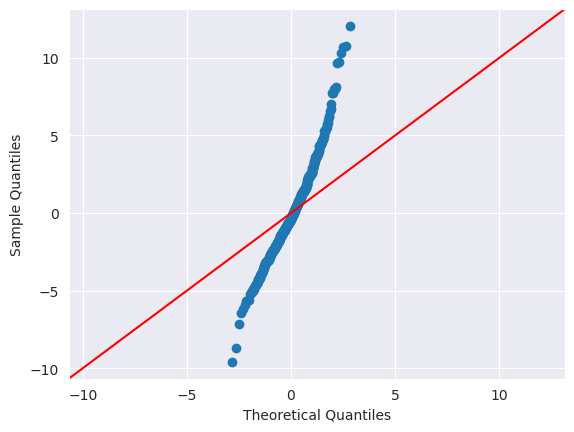

In [80]:
sm.qqplot(results_upd1.resid, line ='45')
py.show()

###### C распределением остатков все так же - оно отличное от нормального

In [88]:
prediction_result = results_upd1.get_prediction(X_scaled)
y_pred = prediction_result.predicted_mean

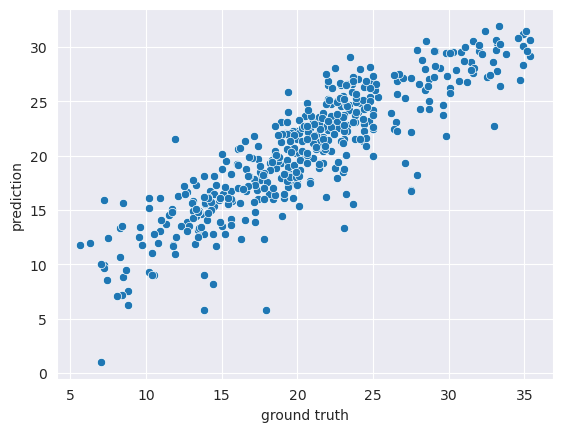

In [89]:
sns.scatterplot(x = y, y = y_pred)
plt.xlabel("ground truth")
plt.ylabel("prediction");

###### 'столбик' справа ожидаемо ушел, по критерию +-1.5 iqr это был выброс

##### Посмотрим на коллинеарноость предикторов, будем использовать vif

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
features = data.columns[:]

# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = features

# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(data.values, i)
                    for i in range(len(data.columns))]

print(vif2_data)

    Feature         VIF
0      crim    2.131404
1        zn    2.910004
2     indus   14.485874
3      chas    1.176266
4       nox   74.004269
5        rm  136.101743
6       age   21.398863
7       dis   15.430455
8       rad   15.369980
9       tax   61.939713
10  ptratio   87.227233
11        b   21.351015
12    lstat   12.615188
13     medv   24.503206


Попробуем выкинуть признаки имеющие большой vif

In [85]:
X_modified = np.delete(X_scaled, [5, 6, 10, 11], 1)   # колонки свдинуты на единицу из-за свободного члена

In [93]:
model_upd2 = sm.OLS(y, X_modified)
results_upd2 = model_upd2.fit()
print(results_upd2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     113.9
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          3.95e-110
Time:                        01:01:06   Log-Likelihood:                -1221.6
No. Observations:                 460   AIC:                             2463.
Df Residuals:                     450   BIC:                             2504.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.5167      0.162    126.369      0.0

In [95]:
prediction_result = results_upd2.get_prediction(X_modified)
y_pred = prediction_result.predicted_mean

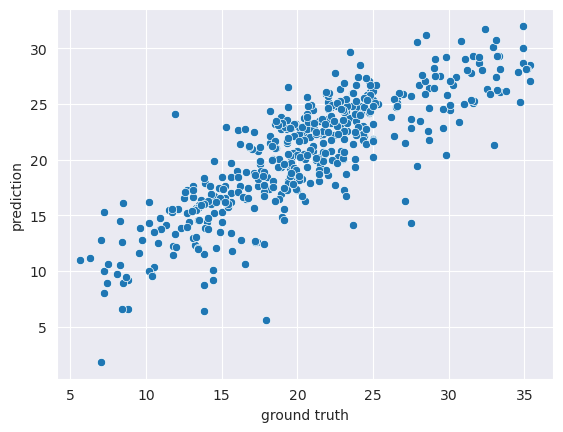

In [96]:
sns.scatterplot(x = y, y = y_pred)
plt.xlabel("ground truth")
plt.ylabel("prediction");

###### Видим что r2 все таки упал по сравнению с моделью построенной по всем признакам

In [98]:
##### сравнить все модели между собой

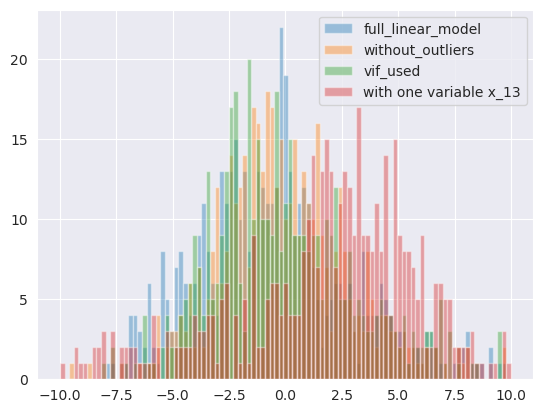

In [115]:
bins = np.linspace(-10, 10, 100)
plt.hist(results_full.resid, bins, alpha=0.4, label='full_linear_model')
plt.hist(results_upd1.resid, bins, alpha=0.4, label='without_outliers')
plt.hist(results_upd2.resid, bins, alpha=0.4, label='vif_used')
plt.hist(residues, bins, alpha=0.4, label='with one variable x_13')
plt.legend(loc='upper right')
plt.show()

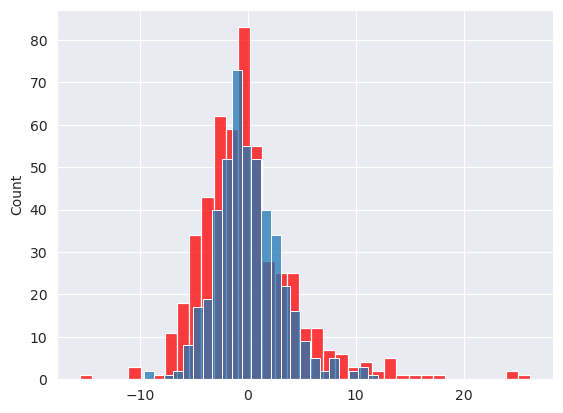

In [117]:
sns.histplot(results_full.resid, color="red")
sns.histplot(results_upd1.resid);


In [121]:
## ошибки модели построенная на данных без выбросов выглядит уже

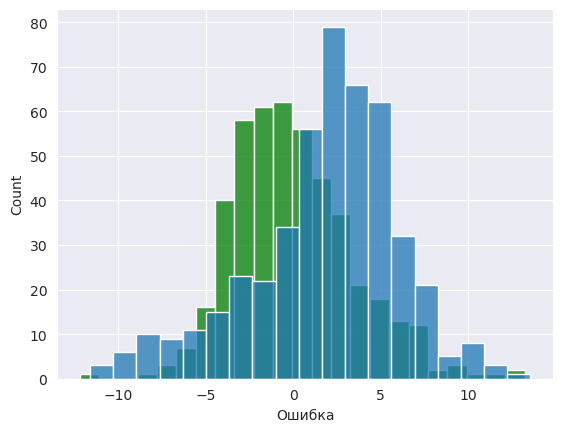

In [122]:
sns.histplot(results_upd2.resid, color="green")
sns.histplot(residues)
plt.xlabel("Ошибка");

###### модель построенная по признакам vif больше ошибается левее 0

###### модель построенная по признаку с большим весом  ошибается чаще правее 0

###### Доп задание
###### Попробую реализовать идею, выделив дома с большей и меньшей стоимосотью на две категории, посмотрю на различие в распределнии признаков, предложу те признаки которые отличаются у домов с высокой стоимостью

In [125]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


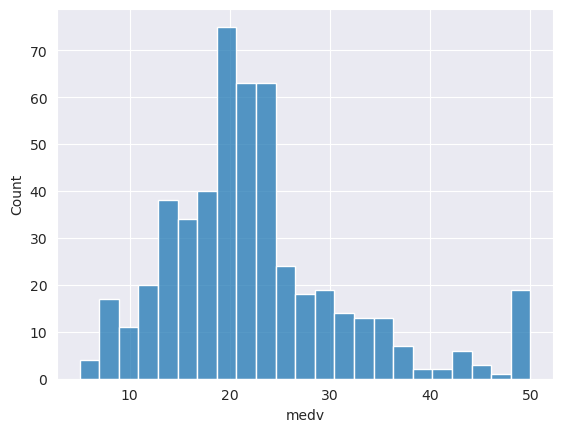

In [127]:
sns.histplot(data["medv"]);

In [128]:
# выставим порог 35

In [161]:
rich_house = data[data['medv'] > 35]
poor_house = data[data['medv'] <= 35]

In [162]:
# неравные выборки

In [166]:
poor_house_sample = poor_house.sample(40)
rich_house_sample = rich_house.sample(40)

In [167]:
rich_house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
179,0.05780,0.0,2.46,0,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,37.2


In [168]:
# после прочтения описания признаков можно проверить различие переменных dis(расстояние до пяти центров) в двух выборках

In [169]:
poor_house["dis"].mean()
rich_house["dis"].mean()

3.6733437499999995

In [170]:
poor_house["dis"].std()

1.947708405257435

In [171]:
rich_house["dis"].std()

1.9281944925854084

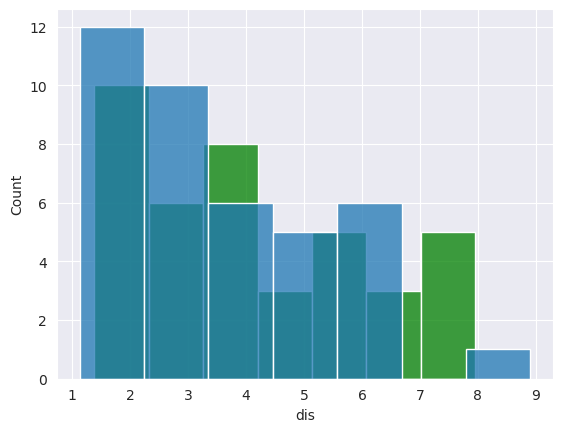

In [172]:
sns.histplot(poor_house_sample["dis"], color = "green")
sns.histplot(rich_house_sample["dis"]);

In [173]:
### распределение не равно, посмотрим стат тестом насколько стат значимо

In [174]:
#размер выборок необльшой,  нельзя принять что они имеют нормальное распределение

In [175]:
from scipy.stats import mannwhitneyu

In [178]:
stat, p_value = mannwhitneyu(poor_house_sample["dis"], rich_house_sample["dis"])

In [180]:
p_value ## не можем отвергнуть нулевую гипотезу, нет эффекта различий

0.015747570753439737

##### Посмтотрим на другие признаки

##### indus что-то типо доли нерозничного (предпринимательского) бизнеса в городе

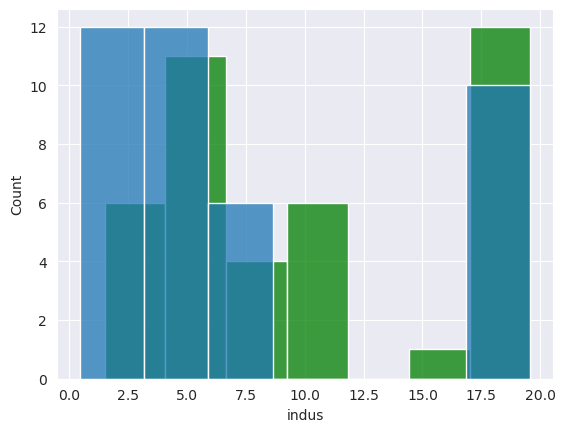

In [181]:
sns.histplot(poor_house_sample["indus"], color = "green")
sns.histplot(rich_house_sample["indus"]);

In [223]:
stat, p_value = mannwhitneyu(poor_house_sample["indus"], rich_house_sample["indus"])
p_value # можем отвергнуть нулевую гипотезу, есть эффект различий
# В домах с большей стоимостью доли предринимательского бизнеса в городе меньше!

0.015747570753439737

###### Посмотрим еще на другой признак - концентрация оксида азота (вроде бы очевидно что должна влиять)

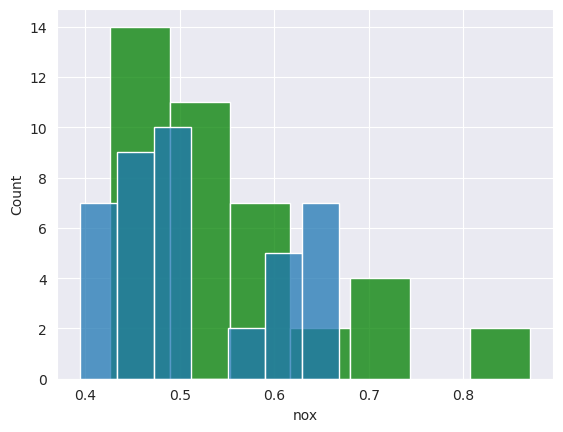

In [224]:
sns.histplot(poor_house_sample["nox"], color = "green")
sns.histplot(rich_house_sample["nox"]);

In [225]:
stat, p_value = mannwhitneyu(poor_house_sample["nox"], rich_house_sample["nox"])
p_value # можем отвергнуть нулевую гипотезу, есть эффект различий
# В домах с большей стоимостью меньше доля концентрация оксида азота

0.10366319421548777

In [226]:
###### Посмотрим еще на другой признак - низкий статус населения (вроде бы очевидно что должна влиять)

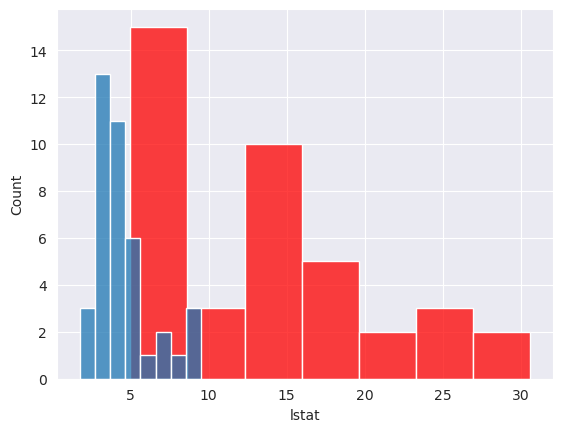

In [227]:
sns.histplot(poor_house_sample["lstat"], color = "red")
sns.histplot(rich_house_sample["lstat"]);

In [228]:
stat, p_value = mannwhitneyu(poor_house_sample["lstat"], rich_house_sample["lstat"])
p_value # можем отвергнуть нулевую гипотезу, есть эффект различий
# В домах с большей стоимостью меньше доля людей с низким статусом меньше

9.896368277625407e-12

In [229]:
###### Посмотрим еще на другой признак - соотошение учеников в городе

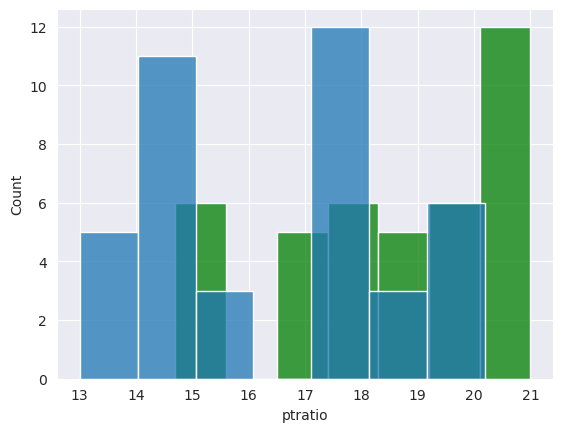

In [230]:
sns.histplot(poor_house_sample["ptratio"], color = "green")
sns.histplot(rich_house_sample["ptratio"]);

In [231]:
stat, p_value = mannwhitneyu(poor_house_sample["ptratio"], rich_house_sample["ptratio"])
p_value # можем отвергнуть нулевую гипотезу, есть эффект различий
# В домах с большей стоимостью соотношение  учеников в городе тяготеет в меньшую сторону

0.0005220117163021397

Итого: заказчику я бы рекомендовал строить дома с меньшей концентрацией оксида азота и кол-во людей с низким социальным статусом, а также где большое соотношение учитель-ученик и где меньше доли предпринимальского бизнеса. 